In [2]:
import pandas as pd
import numpy as np

from glob import glob

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Prep for heatmap

In [6]:
networks_dir = "/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/"
files = glob(networks_dir+"*/*nodes.tsv")
files[:10]

['/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_1_b_0.75_g_10000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.75_b_0.5_g_3000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.25_b_1.5_g_10000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.25_b_1_g_1000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.75_b_1.5_g_1000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.5_b_0.75_g_10000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171206/param_sweep_1/forest/w_0.25_b_0.5_g_10000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_anal

In [7]:
dic = {}
tags = []

for file in files: 
    
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    tags.append(tag)
    
    with open(file, 'r') as f: 
        
        f.readline()
        
        for line in f.readlines(): 
            
            protein, degree, _, prize, node_type = line.rstrip().split('\t')
            
            if protein in dic: 
                
                dic[protein]["membership"].append(tag)
            
            else: 
                
                dic[protein] = {}
                dic[protein]["membership"] = []
                dic[protein]["log_degree"] = np.log2(int(float(degree)))
                dic[protein]["prize"] = prize
                dic[protein]["type"] = node_type

In [8]:
out = []
header = "\t".join(["gene", "prize", "type", "log_degree"]+tags)

out.append(header)

for protein in dic: 
    row = "\t".join([protein, dic[protein]["prize"], dic[protein]["type"], str(dic[protein]["log_degree"])]+
                    ["1" if tag in dic[protein]["membership"] else "0" for tag in tags])
    out.append(row)
    
with open(networks_dir+'/node_membership_summary.tsv', 'w') as f:
    f.write("\n".join(out))

# Randomizations summary

In [71]:
networks_dir = "/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/"
files = glob(networks_dir+"*/*nodes.tsv")
files[:10]

['/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.25_g_10.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.25_g_100.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.25_g_1000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.25_g_30.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.25_g_300.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.5_g_10.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_3/robust_network/w_10_b_0.5_g_100.nodes.tsv',
 '/Users/jonathan

In [100]:
from functools import reduce

dfs_robustness = []
dfs_specificity = []
dic = {}

for file in files: 
    
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    
    df = pd.read_csv(file, sep='\t')
    df_robustness = df[["protein", "robustness"]]
    df_robustness.columns = ["protein", tag]
    dfs_robustness.append(df_robustness)
    
    df_specificity = df[["protein", "specificity"]]
    df_specificity.columns = ["protein", tag]
    dfs_specificity.append(df_specificity)
    
    with open(file, 'r') as f: 
        f.readline()
        for line in f.readlines(): 
            protein, degree, _, prize, robustness, specificity, node_type = line.rstrip().split('\t')
            if protein not in dic: 
                dic[protein] = {}
                dic[protein]["log_degree"] = np.log2(int(float(degree)))
                dic[protein]["prize"] = prize
                dic[protein]["type"] = node_type
                
                
attribs = pd.DataFrame.from_dict(dic, orient="index")    
    
df_robustness_final = reduce(lambda left,right: pd.merge(left,right,on='protein', how='outer'), dfs_robustness)
df_robustness_final.dropna(thresh=20,inplace=True)
df_robustness_final.fillna(0, inplace=True)

df_specificity_final = reduce(lambda left,right: pd.merge(left,right,on='protein', how='outer'), dfs_specificity)
df_robustness_final.dropna(thresh=30,inplace=True)
df_specificity_final.fillna(0, inplace=True)


In [101]:
df_robustness_final.shape, df_specificity_final.shape

((1047, 41), (2218, 41))

In [102]:
df_robustness_final = df_robustness_final.merge(attribs, left_on="protein", right_index=True, how='left')
df_specificity_final = df_specificity_final.merge(attribs, left_on="protein", right_index=True, how='left')

df_robustness_final.to_csv(networks_dir+'/robustness_summary.tsv', sep='\t', index=False)
df_specificity_final.to_csv(networks_dir+'/specificity_summary.tsv', sep='\t', index=False)

# Node membership clustergram

In [6]:
networks_dir = "/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/"

files = glob(networks_dir+"*/*nodes.tsv")

files[:10]

['/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.25_g_10.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.25_g_100.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.25_g_30.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.25_g_300.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.5_g_10.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.5_g_100.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171113/param_sweep_1/forest/w_10_b_0.5_g_1000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_2

In [7]:
dfs = []
mapper = {"steiner": 1, "TF": 2, "terminal": 3}

for file in files: 
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    
    df = pd.read_csv(file, sep='\t')
    df[tag] = df["type"].apply(lambda x: mapper[x])
    df = df[["protein", tag]].set_index("protein")
    
    dfs.append(df)
    
merged = pd.concat(dfs, axis=1).fillna(0)

In [9]:
merged.head()

,w_10_b_0.25_g_10,w_10_b_0.25_g_100,w_10_b_0.25_g_30,w_10_b_0.25_g_300,w_10_b_0.5_g_10,w_10_b_0.5_g_100,w_10_b_0.5_g_1000,w_10_b_0.5_g_10000,w_10_b_0.5_g_30,w_10_b_0.5_g_300,...,w_10_b_1_g_30,w_10_b_1_g_300,w_10_b_1_g_3000,w_10_b_2_g_10,w_10_b_2_g_100,w_10_b_2_g_1000,w_10_b_2_g_10000,w_10_b_2_g_30,w_10_b_2_g_300,w_10_b_2_g_3000
AAK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
AARS,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
AASDHPPT,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
AASS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
ABAT,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


/Users/jonathanli/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


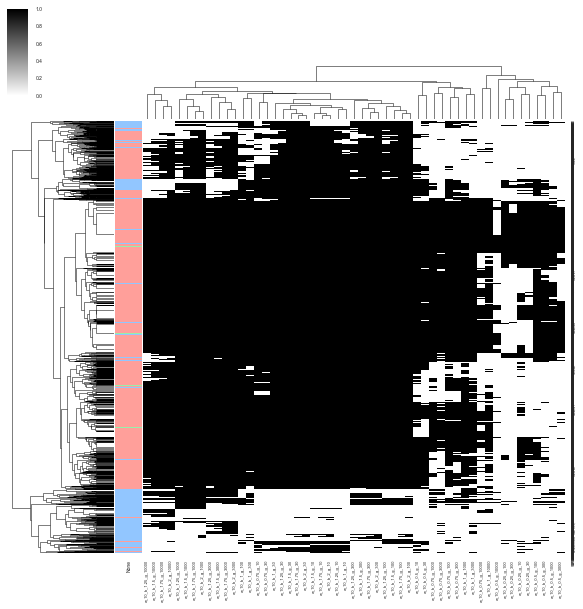

In [8]:
sns.set(font_scale=0.5)

# steiner: blue, TF: green, terminal: red
palette = sns.color_palette("pastel")
row_colors = merged.max(axis=1).map({i:palette[i-1] for i in range(len(palette))})

cm = sns.clustermap(merged>0, row_colors=row_colors, cmap=sns.cubehelix_palette(dark=0, light=1, hue=0, as_cmap=True))

hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), fontsize=4)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=3)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width, col.height*0.5])

cm.savefig(networks_dir+'/param_node_membership.pdf')